# CSCE 633 :: Machine Learning :: Texas A&M University :: Spring 2022

# Programming Assignment 4 (PA 4)
**Name:**  Ajinkya Zalkikar
**UIN:**  530005943

# Regression and Classification Trees
- **100 points**
- **Due Tuesday, April 19, 11:59 pm**

In this assignment, you'll be coding up regression and classification trees from scratch. Trees are a special class of graphs with only directed edges sans any cycles. They fall under the category of directed acyclic graphs or DAGs. So, trees are DAGs where each child node has only one parent node.  

Since trees are easy to design recursively, it is super important that you're familiar with **recursion**. So, it is highly recommended that you brush up on recursion and tree-based search algorithms such as depth-first search (BFS) and breadth-first search (BFS). 

### Instructions
- You are **NOT** allowed to use machine learning libraries such as scikit-learn to build regression and classification trees for this assignment.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to change the definition of the methods and the name of the methods within each class. 
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary. 
- Do **NOT REMOVE or CHANGE** any code that is **NOT** in the regressor and classifier class, and is not marked with `"YOUR CODE HERE"`.
- Once you've filled out your solutions, submit the notebook on Canvas.
- Do **NOT** forget to type in your name and UIN at the beginning of the notebook.

Below is a suggested sequence of steps you may want to think along for building regression and classification trees.

1. **Defining a criteria for splitting.**
    1. This criteria assigns a score to a split.
    1. For regression trees, this would be the mean squared error.
    2. For decision trees, this would be the entropy.
2. **Create the split.**
    1. Split the dataset by iterating over all the rows and feature columns.
    2. Evaluate all the splits using the splitting criteria.
    3. Choose the best split.
3. **Build the tree.**
    1. Terminal nodes: decide when to stop growing a tree. This would be the maximum allowed depth of the tree or when a leaf is empty or has only 1 element.
    2. Recursive splitting: once a split is created, you can split it further recursively by calling the same splitting function on it.
    3. Building a tree: create a root node and apply recursive splitting on it.
4. **Make predictions with the tree.**
    1. For a given data point, make a prediction using the tree.

## Question 1 (50 points)

## Growing a maximum-depth regression tree

The recursive procedure for growing a deep regression tree is illustrated in the figure below. We begin (on the left) by fitting a stump to the original dataset. As we move from left to right the recursion proceeds, with each leaf of the preceding tree split in order to create the next, deeper tree. As can be seen in the rightmost panel, a tree with maximum depth of four is capable of representing the training data perfectly.  

![Error loading image](http://people.tamu.edu/~sumedhpendurkar/csce633/decision_tree_img.jpeg)

**Peform the experiment shown in the figure by coding up a recursively defined regression tree. Instead of reproducing the plot, measure and plot the mean squared error (MSE) at each depth of your tree.**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
csvname = 'http://people.tamu.edu/~sumedhpendurkar/csce633/noisy_sin_subsample_2.csv'
data_regress = np.loadtxt(csvname, delimiter = ',')
data_regress = np.array([[x, y] for x,y in zip(*data_regress)])

In [ ]:
data_regress

array([[ 0.023528,  0.44822 ],
       [ 0.17358 ,  0.60278 ],
       [ 0.215   ,  0.88859 ],
       [ 0.35531 ,  1.0266  ],
       [ 0.41464 ,  0.67935 ],
       [ 0.53799 , -0.10388 ],
       [ 0.68608 , -1.1745  ],
       [ 0.81336 , -1.1745  ],
       [ 0.95399 , -0.34193 ]])

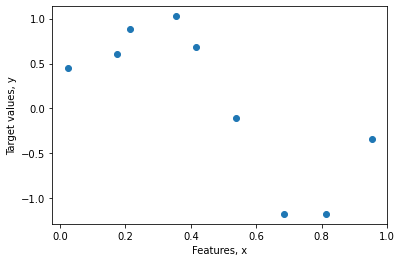

In [ ]:
# Plot the data
plt.figure()
plt.scatter(data_regress[:, 0], data_regress[:, 1])
plt.xlabel("Features, x")
plt.ylabel("Target values, y")
plt.show()

**Build the regression tree in the `TreeRegressor` class**.  
***TIP:*** *If you are smart about building the regression tree, you can reuse most of the code for building the classification tree in Question 2.*

In [ ]:
from posixpath import split
class Node():
    def __init__(self,feature_index=None,limit=None,left2=None,right2=None,varred=None,value=None):
      self.feature_index=feature_index
      self.limit=limit
      self.left2=left2
      self.right2=right2
      self.varred=varred
      self.value=value

class TreeRegressor():
    def __init__(self, data, max_depth=1):
        self.data = data # last element of each row in data is the target variable
        self.max_depth = max_depth # maximum depth
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields
        self.root = None
        self.X = data[:,0]
        self.y = data[:,1]

    
    def generate_tree(self):
        """
        Generates a tree recursively.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        samples = len(self.X)
        num_of_features = 1
        split_dict = {}
        split_dict = self.split_func(self.data,samples,num_of_features)
        if split_dict["var"]>0:
          left_tree = self.generate_tree(split_dict["left_data"])
          right_tree = self.generate_tree(split_dict["right_data"])
          return Node(split_dict["feature_index"],split_dict["limit"],left_tree,right_tree,split_dict["var"])
        leafval = self.calculate_leafval(self.y)
        return Node(value=leafval)

    def split_func(self,data,samples,num_of_features):
        split_dict = {}
        varred =-float("inf")
        featureval = self.data[:,0]
        print(type(featureval))
        print(featureval)
        threshold = np.unique(featureval)
        for limit in threshold:
          left_data,right_data = self.split(self.X,featureval,limit)
          if len(left_data)>0 and len(right_data)>0:
            self.y,left_y,right_y = self.data[:1],left_data[:1],right_data[:1]
            trialvar = self.var_reduction(self.y,left_y,right_y)
            if trailvar > varred:
              split_dict["feature_index"]=feature_index
              split_dict["limit"]=limit
              split_dict["left_data"]=left_data
              split_dict["right_data"]=right_data
              varred = trialvar
        return split_dict

    def split(self,X,featureval,limit):
      left_data=[]
      right_data=[]
  

    def var_reduction(self,parent,left,right):
      weight_l = len(left)/len(parent)
      weight_r = len(right)/len(parent)
      reduction = np.var(parent) - (weight_l*np.var(left) + weight_r*np.var(right))
      return reduction

    def calculate_leafval(self,y):
      val = np.mean(self.y)
      return val

    
    def mean_squared_error(self, splits):
        """
        Returns the mean squared error for a split dataset.
        
        Args:
            splits: array containing splits
        Returns:
            MSE
        """
        ######################
        #   YOUR CODE HERE   #
        ######################

    def predict(self, tree, data_point):
        """
        Returns the prediction for a sample data point.

        Args:
            tree: the tree object
            data_point: a data point
        Returns:
            The predicted value.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################    
        pred = [self.make_pred(x,self.root) for x in data_point]
        if tree.value!= None: return tree.value
        featureval = data_point[tree.feature_index]
        if featureval<=tree.limit:
          return self.predict(tree.left2,data_point)
        else:
          return self.predict(tree.right2,data_point)

    def make_pred(self,data_point):
      return self.predict(tree,data_point)



**Don't forget to create a method to make predictions using your tree. You may create a separate function for it or make it a part of the `TreeRegressor` class.** 

**Plot the MSE at each depth of your tree**

In [ ]:
mse_depths = []
for depth in range(1, 5):
    # Create a regression tree object
    regressor = TreeRegressor(data_regress, depth)
    # Train the tree
    tree = regressor.generate_tree()
    mse = 0.0
    for data_point in data_regress:
        mse += (data_point[-1] - predict(tree, data_point[:-1]))**2
    mse_depths.append(mse/len(data_regress))

In [ ]:
# Plot the MSE
plt.figure()
plt.plot(mse_depths, '-o')
plt.xlabel("Depth")
plt.ylabel("MSE")
plt.show()

## Question 2 (50 points)

## Growing a two-class classification tree

The figure below shows the growth of a tree to a maximum depth of seven on a two-class classification dataset. As the tree grows, note how many parts of the input space do not change as leaves on the deeper branches become *pure*. By the time we reach a maximum depth of seven, there is considerable overfitting. 

![Error loading image](http://people.tamu.edu/~sumedhpendurkar/csce633/decision_tree_img_2.jpeg)

**Perform the experiment shown in figure by coding up a recursively defined two-class classification tree. Instead of reproducing the plot, measure and plot the classification accuracy at each depth of your tree.**

In [ ]:
csvname = 'http://people.tamu.edu/~sumedhpendurkar/csce633/new_circle_data.csv'
data_class = np.loadtxt(csvname, delimiter = ',')
data_class = np.array([[x1, x2, y] for x1,x2,y in zip(*data_class)])

In [ ]:
# Plot the data
plt.figure()
plt.scatter(data_class[:, 0], data_class[:, 1], c=-data_class[:, 2], cmap='bwr')
plt.xlabel("Features, x1")
plt.ylabel("Features, x2")
plt.show()

In [ ]:
# TreeClassifier is a derived class of TreeRegressor

class TreeClassifier(TreeRegressor):
    def generate_tree(self):
        """
        Generates a tree recursively.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################

    samples = len(self.X)
        num_of_features = 1
        split_dict = {}
        split_dict = self.split_func(self.data,samples,num_of_features)
        if split_dict["var"]>0:
          left_tree = self.generate_tree(split_dict["left_data"])
          right_tree = self.generate_tree(split_dict["right_data"])
          return Node(split_dict["feature_index"],split_dict["limit"],left_tree,right_tree,split_dict["var"])
        leafval = self.calculate_leafval(self.y)
        return Node(value=leafval)

    def split_func(self,data,samples,num_of_features):
        split_dict = {}
        varred =-float("inf")
        featureval = self.data[:,0]
        print(type(featureval))
        print(featureval)
        threshold = np.unique(featureval)
        for limit in threshold:
          left_data,right_data = self.split(self.X,featureval,limit)
          if len(left_data)>0 and len(right_data)>0:
            self.y,left_y,right_y = self.data[:1],left_data[:1],right_data[:1]
            trialvar = self.var_reduction(self.y,left_y,right_y)
            if trailvar > varred:
              split_dict["feature_index"]=feature_index
              split_dict["limit"]=limit
              split_dict["left_data"]=left_data
              split_dict["right_data"]=right_data
              varred = trialvar
        return split_dict

    def split(self,X,featureval,limit):
      left_data=[]
      right_data=[]
  

    
    def entropy(self, y):
        """
        Returns the entropy for a split dataset.
        
        Args:
            splits: array containing splits
        Returns:
            Entropy
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        entropy = 0
        for c in range(2):
          p = len(y[y==c]/len(y))
          entropy = entropy + -p*np.log2(p)
        return entropy


**Don't forget to create a method to make predictions using your tree.**  

In [ ]:
def predict(tree, data_point):
    """
    Returns the prediction for a sample data point.

    Args:
        tree: the tree object
        data_point: a data point
    Returns:
        The predicted class.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################

**Plot the classification accuracy at each depth of your tree.**

In [ ]:
accuracy_depths = []
for depth in range(1, 8):
    # Create a classification tree object
    classifier = TreeClassifier(data_class, depth)
    # Train the tree
    tree = classifier.generate_tree()
    correct = 0.0
    for data_point in data_class:
         correct += float(data_point[-1] == predict(tree, data_point[:-1]))
    accuracy_depths.append(correct/len(data_class))

In [ ]:
# Plot the Accuracy
plt.figure()
plt.plot(accuracy_depths, '-o')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()